# 저번주 리뷰

In [1]:
from sklearn.datasets import load_boston , load_digits
boston = load_boston()
dig = load_digits()

from sklearn import datasets
boston = datasets.load_boston()
dig = datasets.load_digits()

# 두 가지 방법 모두 사용 가능, 협업할 땐 서로의 스타일을 맞춰야 한다.

/home/lsg/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [6]:
boston
import pandas as pd
boston_df = pd.DataFrame(
        boston['data'],
    columns= boston['feature_names']
)
boston_df['price'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
boston = load_boston(as_frame=True)  ## as_frame이 지원되는 데이터셋은 이런식으로 변환하는것도 가능
boston_df = boston.data
boston_df['price'] = boston.target

/home/lsg/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

TypeError: load_boston() got an unexpected keyword argument 'as_frame'

In [7]:
# 데이터 분리
X= boston_df.drop(columns='price')
y= boston_df['price']
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
print(f"W:{model.coef_}")
print(f"b:{model.intercept_}")


W:[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
b:36.93325545711963


In [11]:
# 성능점수
print(model.score(X_test, y_test), model.score(X_train,y_train)) # 선형회귀의 기본적 성능평가 모델은 R2값

0.6354638433202127 0.7697699488741149


In [14]:
# 다항회귀를 이용하여 성능점수 향상시키기
# 낮은 test점수 향상을 위해 다양변환으로 접근
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2, include_bias=False) # 2차항 추가
X_poly = P.fit_transform(X)
X_poly
pd.DataFrame(X_poly, columns = P.get_feature_names_out())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM^2,CRIM ZN,CRIM INDUS,CRIM CHAS,CRIM NOX,CRIM RM,CRIM AGE,CRIM DIS,CRIM RAD,CRIM TAX,CRIM PTRATIO,CRIM B,CRIM LSTAT,ZN^2,ZN INDUS,ZN CHAS,ZN NOX,ZN RM,ZN AGE,ZN DIS,ZN RAD,ZN TAX,ZN PTRATIO,ZN B,ZN LSTAT,INDUS^2,INDUS CHAS,...,NOX TAX,NOX PTRATIO,NOX B,NOX LSTAT,RM^2,RM AGE,RM DIS,RM RAD,RM TAX,RM PTRATIO,RM B,RM LSTAT,AGE^2,AGE DIS,AGE RAD,AGE TAX,AGE PTRATIO,AGE B,AGE LSTAT,DIS^2,DIS RAD,DIS TAX,DIS PTRATIO,DIS B,DIS LSTAT,RAD^2,RAD TAX,RAD PTRATIO,RAD B,RAD LSTAT,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.000040,0.11376,0.014599,0.0,0.003400,0.041554,0.412064,0.025849,0.00632,1.87072,0.096696,2.508408,0.031474,324.0,41.58,0.0,9.684,118.35,1173.6,73.62,18.0,5328.0,275.4,7144.2,89.64,5.3361,0.0,...,159.248,8.2314,213.53220,2.67924,43.230625,428.6900,26.891750,6.575,1946.200,100.5975,2609.61750,32.74350,4251.04,266.66800,65.2,19299.2,997.56,25877.880,324.696,16.728100,4.0900,1210.6400,62.57700,1623.321000,20.368200,1.0,296.0,15.3,396.90,4.98,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.000746,0.00000,0.193082,0.0,0.012808,0.175358,2.154759,0.135652,0.05462,6.60902,0.486118,10.839339,0.249613,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,49.9849,0.0,...,113.498,8.3482,186.14610,4.28666,41.229241,506.6169,31.893749,12.842,1553.882,114.2938,2548.49490,58.68794,6225.21,391.90419,157.8,19093.8,1404.42,31315.410,721.146,24.672082,9.9342,1202.0382,88.41438,1971.441990,45.399294,4.0,484.0,35.6,793.80,18.28,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.000745,0.00000,0.192940,0.0,0.012799,0.196079,1.667419,0.135552,0.05458,6.60418,0.485762,10.720331,0.109979,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,49.9849,0.0,...,113.498,8.3482,184.23727,1.89007,51.624225,439.0035,35.688614,14.370,1738.770,127.8930,2822.48355,28.95555,3733.21,303.48981,122.2,14786.2,1087.58,24001.913,246.233,24.672082,9.9342,1202.0382,88.41438,1951.225893,20.017413,4.0,484.0,35.6,785.66,8.06,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.001048,0.00000,0.070567,0.0,0.014825,0.226525,1.482546,0.196233,0.09711,7.18614,0.605319,12.774173,0.095168,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,4.7524,0.0,...,101.676,8.5646,180.74054,1.34652,48.972004,320.5084,42.423276,20.994,1553.556,130.8626,2761.62074,20.57412,2097.64,277.64876,137.4,10167.6,856.46,18074.054,134.652,36.750269,18.1866,1345.8084,113.36314,2392.325986,17.822868,9.0,666.0,56.1,1183.89,8.82,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.004768,0.00000,0.150529,0.0,0.031625,0.493500,3.742510,0.418595,0.20715,15.32910,1.291235,27.405945,0.368036,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,4.7524,0.0,...,101.676,8.5646,181.78020,2.44114,51.079609,387.3674,43.326543,21.441,1586.634,133.6489,2836.64430,38.09351,2937.64,328.57124,162.6,12032.4,1013.54,21511.980,288.886,36.750269,18.1866,1345.8084,113.36314,2406.087180,32.311526,9.0,666.0,56.1,1190.70,15.99,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0.003923

In [15]:
P.get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [16]:
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
print(f"W:{model.coef_}")
print(f"b:{model.intercept_}")
# 성능점수
print(model.score(X_test, y_test), model.score(X_train,y_train)) # 선형회귀의 기본적 성능평가 모델은 R2값

W:[-1.64982065e-01  9.78768204e-02 -6.00830101e+00  1.72901627e+01
 -2.76210318e+01  4.59980454e+00  1.23521450e+00 -1.06768479e+01
  1.12375581e+00  6.36836821e-02  2.47894959e+00 -1.66621791e-01
 -1.51329350e+00  1.54157351e-03  3.35032647e-01  6.18369084e-01
  1.28343800e+00 -3.92467681e-01  8.82153503e-02 -2.80862760e-03
  5.88881503e-02  6.24598983e-01 -4.80450237e-02  2.66436658e-01
 -6.18419376e-05  1.33351278e-02 -1.33981515e-03 -7.10753245e-03
 -2.57541277e-02 -1.66693442e+00  1.85096641e-02  5.06100636e-04
 -7.38494303e-04 -3.32475730e-03  6.44727288e-04 -1.21770628e-02
  1.72747990e-03 -4.79452549e-03  5.75287724e-02  4.17845341e-02
 -5.82812022e-02  3.99128102e-01  5.39381038e-03  1.79853108e-01
 -5.12733718e-02  1.34811787e-03 -5.41478202e-02  5.60458402e-03
 -1.24570659e-02  1.72901629e+01 -3.64699381e+01 -6.51213228e+00
  7.30174887e-02 -8.38907548e-01  7.47740297e-01 -2.43737465e-02
 -1.27369767e+00  1.44705208e-01 -4.83807573e-01  1.73628340e+01
  1.15779270e+01 -3.742

In [18]:
# 3차항 변환
# 다항회귀를 이용하여 성능점수 향상시키기
# 낮은 test점수 향상을 위해 다양변환으로 접근
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) # 2차항 추가
X_poly = P.fit_transform(X)
X_poly
pd.DataFrame(X_poly, columns = P.get_feature_names_out())
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
# 성능점수
print(model.score(X_test, y_test), model.score(X_train,y_train)) # 선형회귀의 기본적 성능평가 모델은 R2값

-9443.834662940344 1.0


In [20]:
# 5차항 변환
# 다항회귀를 이용하여 성능점수 향상시키기
# 낮은 test점수 향상을 위해 다양변환으로 접근
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=5, include_bias=False) # 2차항 추가
X_poly = P.fit_transform(X)
X_poly
pd.DataFrame(X_poly, columns = P.get_feature_names_out())
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
# 성능점수
print(model.score(X_test, y_test), model.score(X_train,y_train)) # 선형회귀의 기본적 성능평가 모델은 R2값

-135.30506303451068 1.0


##### 훈련점수는 다항변화를 통해 향상시킬수 있음, 관건은 테스트 점수 높이기

# 선형회귀 이어서

## 규제화 Regularization

### Ridge(L2규제) 적용

In [22]:
# Ridge 회귀 적용(L2규제)
# 정규화
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)


# 3차항 변환
# 다항회귀를 이용하여 성능점수 향상시키기
# 낮은 test점수 향상을 위해 다양변환으로 접근
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) # 3차항 추가
X_poly = P.fit_transform(X_scaled)
pd.DataFrame(X_poly, columns = P.get_feature_names_out())
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
# Ridge 규제
from sklearn.linear_model import Ridge
model = Ridge().fit(X_train, y_train)
# 성능점수
print(model.score(X_train,y_train), model.score(X_test, y_test)) # 선형회귀의 기본적 성능평가 모델은 R2값

0.9242749146283599 0.7865342899841081


#### 규제 강도에 따른 가중치 값 시각화

In [23]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


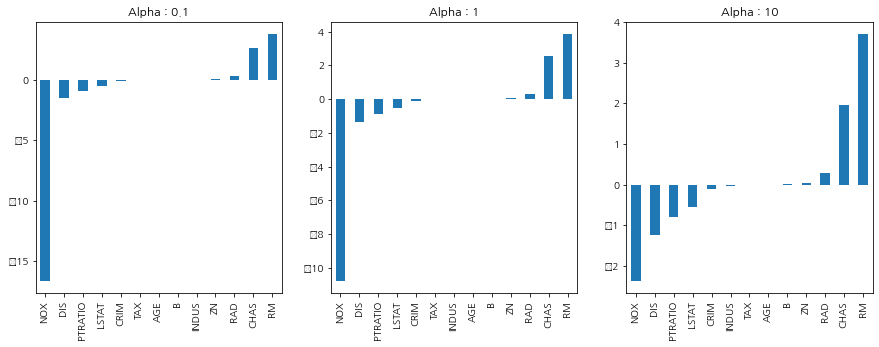

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

### Lasso(L1규제) 적용

In [26]:
# Ridge 회귀 적용(L2규제)
# 정규화
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)


# 3차항 변환
# 다항회귀를 이용하여 성능점수 향상시키기
# 낮은 test점수 향상을 위해 다양변환으로 접근
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) # 3차항 추가
X_poly = P.fit_transform(X_scaled)
pd.DataFrame(X_poly, columns = P.get_feature_names_out())
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
# Lasso 규제
from sklearn.linear_model import Lasso
model = Lasso().fit(X_train, y_train)
# 성능점수
print(model.score(X_train,y_train), model.score(X_test, y_test)) # 선형회귀의 기본적 성능평가 모델은 R2값

0.2933995968826698 0.2124796640448665


#### 규제 강도에 따른 가중치 값 시각화

In [27]:
Lasso01 = Lasso(alpha=0.1).fit(boston['data'], boston['target'])
Lasso01_coef = pd.Series(Lasso01.coef_, index=boston['feature_names'])

Lasso1 = Lasso(alpha=1).fit(boston['data'], boston['target'])
Lasso1_coef = pd.Series(Lasso1.coef_, index=boston['feature_names'])

Lasso10 =Lasso(alpha=10).fit(boston['data'], boston['target'])
Lasso10_coef = pd.Series(Lasso10.coef_, index=boston['feature_names'])

/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


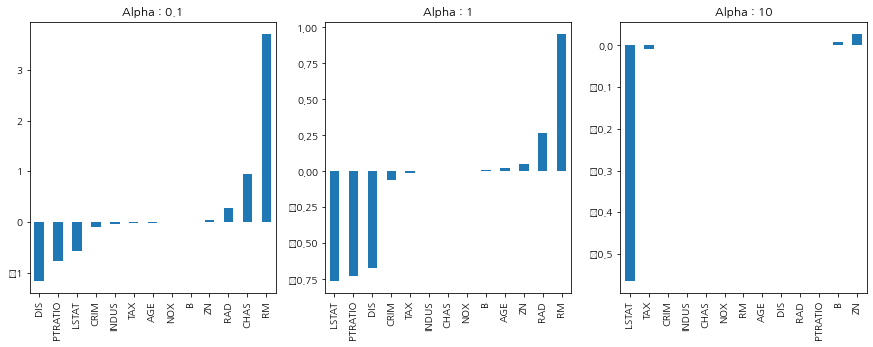

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
Lasso01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
Lasso1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
Lasso10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

#### boston데이터셋에선 Lasso 보단 Ridge를 통한 점수 향상 효과가 뛰어남을 확인 할 수 있음

## One-Hot encoding

In [30]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
# One-Hot encoding으로 문자형 데이터 숫자형으로 변환
import pandas as pd
tips_ohe = pd.get_dummies(tips, columns=["sex","smoker","day","time"])

# 데이터 분할
y= tips_ohe['tip']
X= tips_ohe.drop(columns = "tip")

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X, y, random_state=0)


In [39]:
# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)

print(model.score(x_tr,y_tr),model.score(x_te,y_te)) #같은 손님이 여러 결과를 낼 수 있기 때문에 직선예측으로는 점수가 낮게 나온다.

0.43718265714767135 0.515660444662607


## 로지스틱 회귀(Logistic Regression)

### 위스콘신 주립대학 유방암 진단데이터

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 데이터 분할
X = cancer['data']
y = cancer['target']
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
# 로지스틱 회귀 이용했을 때의 성능
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test,y_test))
# KNN사용했을 때의 성능
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test,y_test))

0.9671361502347418 0.9370629370629371
0.9460093896713615 0.916083916083916


### 타이타닉 생존자 데이터

In [44]:
import seaborn as sns
ti = sns.load_dataset('titanic')

In [45]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [53]:
ti.isna().sum()
ti['age'] = ti['age'].fillna(ti['age'].mean()) # 결측치 제거

In [54]:
X = ti[['pclass','age','sibsp','parch','fare']]
y = ti['survived']
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
# 로지스틱 회귀 이용했을 때의 성능
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test,y_test))
# KNN사용했을 때의 성능
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test,y_test))

0.7095808383233533 0.6860986547085202
0.7769461077844312 0.6771300448430493


#### 타이타닉 데이터셋의 경우 훈련 점수는 knn이 더 높지만 테스트 점수는 로지스틱 회귀가 더 높기 때문에 로지스틱 회귀를 채택

### 손글씨 데이터셋

In [55]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [61]:
print(digits['images'][9])  # 숫자가 높을수록 진하게 그려진 곳

[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]


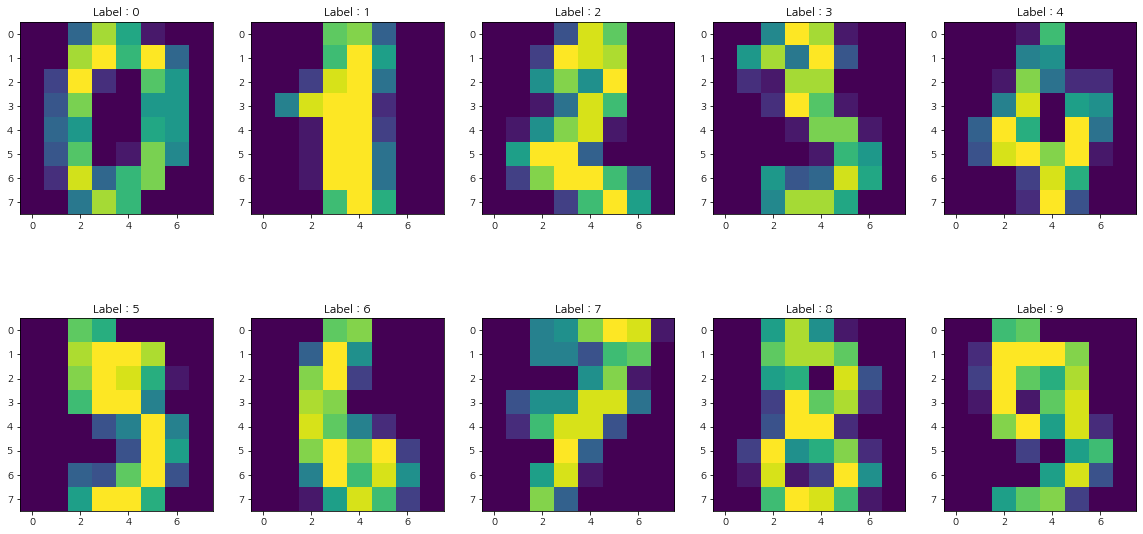

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()


In [63]:
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)


(1e+00, 0.9644444444444444)

### Roc Curve 시각화

In [74]:
# 이진 분류를 위한 데이터세트 준비
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, Y = cancer['data'], cancer['target']

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


In [75]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression(max_iter=100000).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)


In [76]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))


KNN 정확도 : 93.71%
Logistic Regression 정확도 : 94.41%
Decision Tree 정확도 : 93.01%
Random Forest 정확도 : 94.41%
Gradient Boosting 정확도 : 95.10%
SVM 정확도 : 92.31%
MLP 정확도 : 93.01%


In [77]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds


(array([0.        , 0.12765957, 1.        ]),
 array([0.     , 0.96875, 1.     ]),
 array([2, 1, 0]))

In [78]:
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc


0.9205452127659575

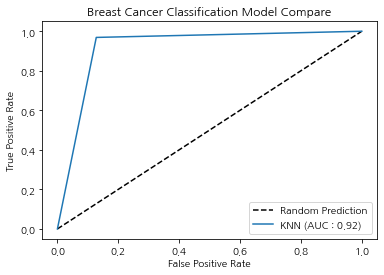

In [79]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()


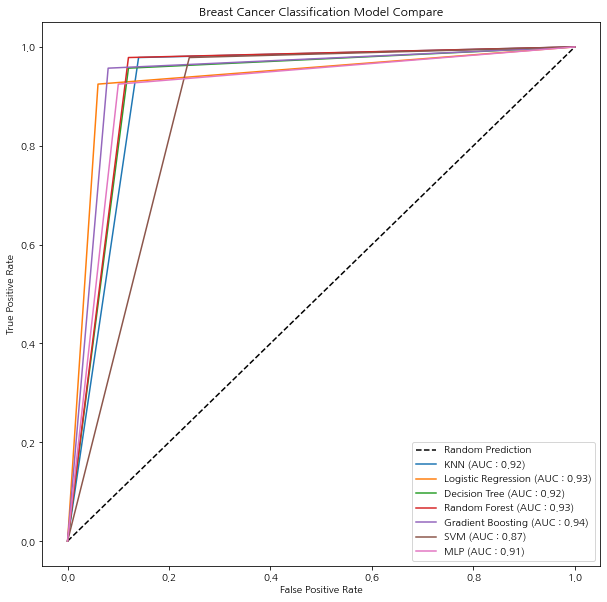

In [71]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()


### 타이타닉 데이터셋의 알고리즘별 분류분석 평가 해보기
- 성별도 특성에 포함시키기

In [116]:
X = ti[['pclass','age','sibsp','parch','fare','sex']]
X = pd.get_dummies(X)
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [117]:
import pandas as pd
ti_ohe = pd.get_dummies(ti, columns=["sex"])
ti_ohe

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,1
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0
888,0,3,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,0
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,1


In [118]:
X = ti_ohe[['pclass','age','sibsp','parch','fare','sex_female','sex_male']]
y = ti_ohe['survived']

In [119]:
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, stratify=y)

In [106]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression(max_iter=10000).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)


In [107]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))


KNN 정확도 : 69.51%
Logistic Regression 정확도 : 78.03%
Decision Tree 정확도 : 78.92%
Random Forest 정확도 : 79.82%
Gradient Boosting 정확도 : 83.41%
SVM 정확도 : 64.13%
MLP 정확도 : 77.58%


In [108]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds


(array([0.        , 0.16058394, 1.        ]),
 array([0.        , 0.46511628, 1.        ]),
 array([2, 1, 0]))

In [111]:
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc


0.7677389237820404

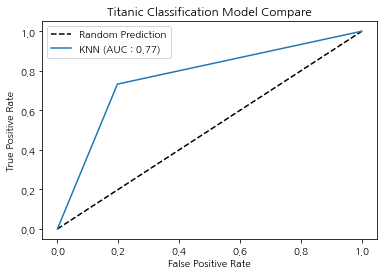

In [112]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()


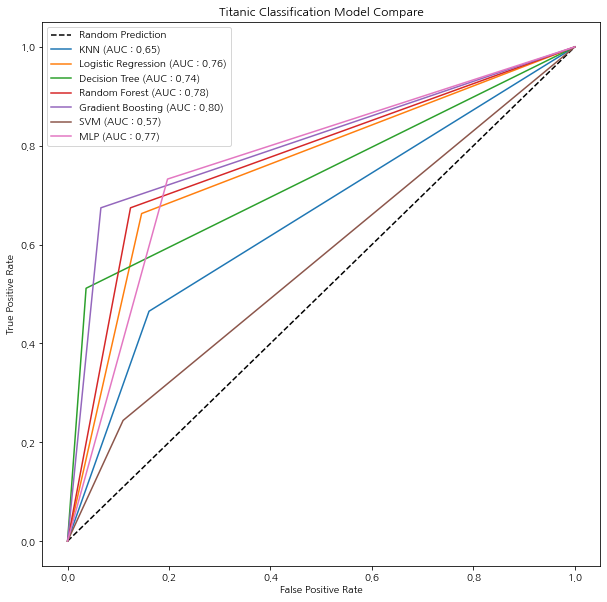

In [114]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()

In [ ]:
# 강사님 코드
# 이진 분류를 위한 데이터세트 준비
import seaborn as sns
ti = sns.load_dataset("titanic")

Y = ti["survived"]
X = ti[["pclass","sex","age","sibsp","parch","fare"]]
X["age"] = X["age"].fillna(X["age"].mean())

import pandas as pd
X = pd.get_dummies(X) # sex문자열을 원핫인코딩으로 변환
X
# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)